features: tensor([[ 1.1483,  0.2118],
        [ 0.8612, -0.4828],
        [-0.7801, -0.8401],
        [ 2.1865, -0.1479]]) 
label: tensor([[4.2019],
        [4.2110],
        [4.2058],
        [4.2202]])


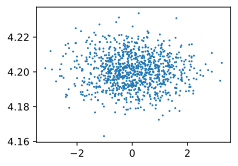

In [1]:
##生成数据集
%matplotlib inline
import random
import torch
from d2l import torch as d2l 
def synthetic_data(w,b,num_examples):
    '''生成y=Xw+b+噪声'''
    X=torch.normal(0,1,(num_examples,len(w))) 
    '''
    X是一个均值为0，方差为1的随机数。 大小是num_examples个样本，列数是w的长度
    这里的X指房屋的关键因素集，
    长度len(w)即列数，表明有len(w)个关键因素，这里是2，
    比如“卧室个数”和“房屋面积”两个关键因素，
    X的行数num_examples=房屋数量
    ''' 
    y=torch.matmul(X,w)+b
    y+=torch.normal(0,0.01,y.shape) #加入随机噪音
    return X,y.reshape((-1,1))
#测试
#true_w = torch.tensor([2, -3.4])
true_w = torch.tensor([0, 0.0])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)  
f=torch.tensor([0,1,2,3])
print('features:', features[f],'\nlabel:', labels[f])

d2l.set_figsize()
d2l.plt.scatter(features[:, (1)].detach().numpy(), labels.detach().numpy(), 1);

In [2]:
#读取数据集
def data_iter(batch_size,features,labels):
    num_examples=len(features) #表示有这么多的样本
   # print('num_examples=',num_examples)
    indices=list(range(num_examples)) #获取一个下标的集合
   # print('indices=',indices)
    #这些样本是随机读取的，没有特定的顺序
    random.shuffle(indices)    #用shuffle方法把这些下标随机打乱
    for i in range(0,num_examples,batch_size):
        batch_indices=torch.tensor(indices[i:min(i+batch_size,num_examples)])
        #print("batch_indices=",batch_indices)
        yield features[batch_indices],labels[batch_indices]
        
#测试
batch_size=5
for X,y in data_iter(batch_size,features,labels):
    print(X,'\n',y)
    break

tensor([[-1.6293,  0.0146],
        [ 1.2699,  0.6353],
        [ 0.4653, -0.0293],
        [ 2.4707, -1.5551],
        [-1.9040,  0.4727]]) 
 tensor([[4.2261],
        [4.1935],
        [4.2012],
        [4.1960],
        [4.2063]])


In [3]:
#初始化模型参数
w = torch.normal(0, 0.01, size=(2,1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

#定义模型
def linreg(X,w,b):
    '''线性回归模型'''
    return torch.matmul(X,w)+b
#定义损失函数
def  squared_loss(y_hat,y):
    '''平方损失'''
    return (y_hat-y.reshape(y_hat.shape))**2/2
#定义优化算法
def sgd(params,lr,batch_size):
    '''小批量随机梯度下降'''
    with torch.no_grad():      ##强制之后的内容不进行计算图构建。                  
        #python with关键字的使用with是python中上下文管理器
        for param in params:
            param-=lr*param.grad/batch_size
            param.grad.zero_()
            

In [4]:
#训练
lr=0.03         #学习率
num_epochs=3     #对数据扫三遍
net=linreg
loss=squared_loss
for epoch in range(num_epochs):
    for X,y in data_iter(batch_size,features,labels):
        l=loss(net(X,w,b),y)
        l.sum().backward()
        sgd([w,b],lr,batch_size)
    with torch.no_grad():               #对数据扫完一遍后 评价一下精度
        train_l=loss(net(features,w,b),labels)
        print(f'epoch{epoch+1},loss{float(train_l.mean()):f}')

epoch1,loss0.000092
epoch2,loss0.000048
epoch3,loss0.000048


In [5]:
#看一下学习到的w b和真实的区别
print(f'w的估计误差：{true_w-w.reshape(true_w.shape)}')
print(f'b的估计误差：{true_b-b}')

w的估计误差：tensor([0.0007, 0.0004], grad_fn=<SubBackward0>)
b的估计误差：tensor([-0.0001], grad_fn=<RsubBackward1>)
